We import the necessary libraries and the dataset itself, which we will call 'vehicles'.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from matplotlib.gridspec import GridSpec
# set dispplay options 
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30

# import the dataset
vehicles = pd.read_csv('vehicles.csv')
vehicles.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


# Data Exploration
___

## NaNs 

Most columns had NaNs below the propotion of 30%, however two notable columns had more than 30% which were **county** (100%), **size** (71.76%), **condition** (40.79%), **cylinders** (41.62%), **VIN** (37.73%), **drive** (30.59%), **size** (71.77%), and **paint_color** (30.5%)

In [2]:
((vehicles.isnull().sum())/vehicles.shape[0])*100

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64

## Variable costs
Columns such as **id**, **url** had 426880 different types of categorical variables, and **region**, **region_url** had 404, 413 unique categorical variables while model had 29667 unique categorical variables and included inconsistent spelling for model names, and included emojis, and different fonts. Additionally, the **image_url** column had 241899 unique values while the description column had 360911 unique values, and the **manufacturer**, and **state** features had unique values of over 42. Addtionally the **VIN** column had 118624 unique value. Here, it can also be pointed out that there were multiple posts for the same VIN for some posts, however this will be ignored for the following reasons:

1. Some of the rows had inconsistent entries for the same VIN
2. Even if we drop rows with the same VINs repetition would not be a problem as bootstrapped data which often include repeated entries still function well with repeated values. However, utilizing these repeated values may potentially cause the function to run longer due to its large volume of data.

In [3]:
print('id: ', len(vehicles.id.unique()), 'url: ', len(vehicles.url.unique()), 'region:' ,len(vehicles.region.unique()), 'region_url: ',len(vehicles.region_url.unique()),'image_url: ', len(vehicles.image_url.unique())-1, 'description: ',len(vehicles.description.unique())-1,'manufacturer: ', len(vehicles.manufacturer.unique())-1,'state: ', len(vehicles.state.unique())-1,'VIN: ', len(vehicles.VIN.unique())-1)

id:  426880 url:  426880 region: 404 region_url:  413 image_url:  241899 description:  360911 manufacturer:  42 state:  50 VIN:  118264


## Variable types of columns

All columns excluding **price**, **odometer**, **year**, **lat** and **long** were categorical variables. The **posting_date** column could be considered as a date object, although it is recorded as a string object. Additionally, it can also be noted that the **cylinders** column may be viewed as an ordinal variable as the entries follow the form 'n cylinders', however we will not treat it as such due to one of the unqiue values in the column, 'others'. This 'others' adds ambiguity as to whether it should be considered higher or lower than some cylinders, and completely excluding it may potentially lose valuable data with that particular value taking up 0.5% of the column which is higher than the '3 cylinders' proportion (0.27%) and the '12 cylinders' proportion (0.08%). All other columns could easily be considered Nominal.

# Data Cleaning
___

# Removing rows and columns

1. We will start by removing rows with more than 50% of the columns (13 columns) NaN values, as they will not contribute much to the accuracy of the model as most values would be imputed values. Moreover, cragistlist is a haven for scams, which may skew the results of the data with unreasonable prices, hence any row missing more than 50% of information would be considered dubious and will be removed in order to create a more accurate result.
2. This step will be followed by removing unnecessary columns. Here since every row almost has a unique id, url, and region_url column these will be removed as they will not contribute much to the final result. Although there are some cars that are the same model there are too many different types with a lot of inconsistent spelling errors, hence this column will be removed as well. Moreover, since condition, cylinders, drive, size, and paint_color are also a columns where over 30% of the rows are NaNs, these will all be removed (with the exception of VINs which will be explained later).
3. Moreover, all entries of posting_date are from 2021 between April and May, hence assessing the impact of seasonality through this feature would not be sensible and investigating the impact of age of the vehicle on price would easily be achieved just through the year column, hence this column willl also be removed.
4. Values with an excessive amount of unique values (> 40) will also additionally be removed, these include id, url, region, region_url, manufacturer, model, country and state in order to avoid including an excessive amount of dummy variables. A method to test whether the existence of image_url and description was planned however, upon going through the aforementioned steps the former column had 0 entries with no image_urls, and the latter only had 1 entry. Hence these two will also be removed
5. Latitude and longitude columns will be removed as the location of sales may be less crucial than the age, odometer, type, and transmission of a car, as car sales rely more on the quality of the vehicles than the location itself, as the buyer may drive out to the different location to obtain the vehicle.

In [4]:
# Remove rows with more than 50% NaN values
vehicles = vehicles[vehicles.isnull().sum(axis = 1) < 13]

# remove columns with more than 70% NaN values
vehicles = vehicles.drop(columns = ['id', 'url', 'region', 'region_url', 'manufacturer', 'model', 'condition', 'cylinders', 'drive', 'size', 'paint_color', 'county', 'state', 'posting_date','description', 'image_url', 'lat', 'long'])

## Altering the VIN column

We will set an additional minimum requirement for a listing on craigslist to be legitimate to include a VIN, as it provides more confidence in the validity of the sale. We will proceed to remove rows with NaNs for VIN , and drop the VIN column as assigning individual dummy variables to each value will require massive computational power.

In [5]:
# Drop rows without a VIN then drop the VIN column
vehicles = vehicles.dropna(subset = ['VIN'])
vehicles = vehicles.drop(columns = ['VIN'])

## Removing outliers in the numeric columns

We will begin by assessing and removing the outliers in the numeric columns price, odometer, and year after removing the rows and columns. Here, we will initiate this process by observing the box-whiskers plot of these two columns.

In [6]:
# Observe extreme values in the price and odometer columns
print('price extreme values:', list(vehicles['price'].loc[vehicles['price'] > 10**6]), '\n', 'odometer extreme values:', list(vehicles['odometer'].loc[vehicles['odometer'] > 10**6]))

price extreme values: [6995495, 123456789, 1234567, 12345678, 12345678, 12345678, 12345678, 12345678, 12345678] 
 odometer extreme values: [1017923.0, 2308454.0, 2006330.0, 2319010.0, 1091331.0, 1000425.0, 1000425.0, 1000425.0, 10000000.0, 3000000.0, 1178855.0, 1000100.0, 1111111.0, 1178855.0, 1096000.0, 1253579.0, 1200290.0, 1130401.0, 1200000.0, 1701289.0, 1075000.0, 1182096.0, 1250000.0, 1111111.0, 2711913.0, 1320000.0, 1001900.0, 1019000.0, 1019000.0, 9999999.0, 1240668.0, 9999999.0, 1200000.0, 1093360.0, 9999999.0, 9999999.0, 1190000.0, 9999999.0, 1001927.0, 1111111.0, 1025578.0, 1025578.0, 1025578.0, 1422929.0, 1111111.0, 1795320.0, 1000011.0, 1234568.0, 1710000.0]


{'whiskers': [<matplotlib.lines.Line2D at 0x284a95760>,
 'caps': [<matplotlib.lines.Line2D at 0x284a95d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x284a95490>],
 'medians': [<matplotlib.lines.Line2D at 0x284aa12e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x284aa15b0>],
 'means': []}

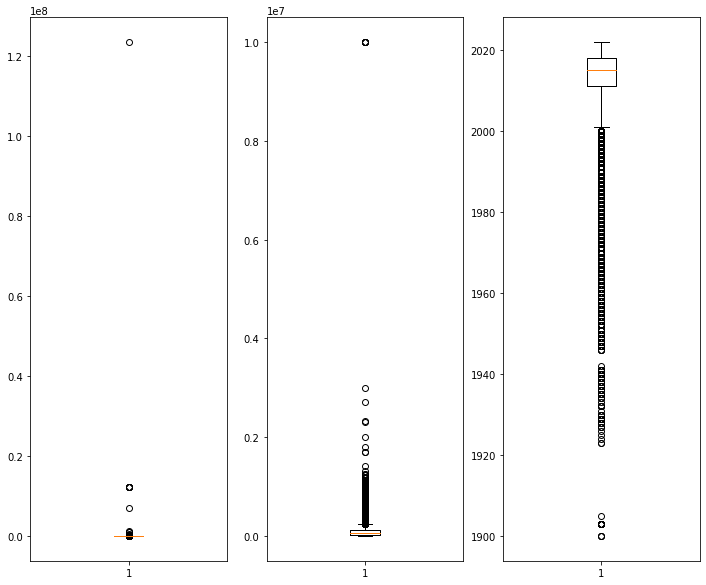

In [7]:
# Plot a box-whiskers graph to visualize the distribution of values for each column
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 10))
ax1.boxplot(vehicles['price'])
ax2.boxplot(vehicles['odometer'][vehicles['odometer'].isnull() == False])
ax3.boxplot(vehicles['year'][vehicles['year'].isnull() == False])

The above plots visibily makes it clear that both plots hold extreme values, where the **price** holds a max value of 123456789, and the **odometer** 10000000. So this stage will be followed by removing outliers lying outside the 95% confidence interval in all columns, in order to increase the accuracy of the model. This will then be followed by removing any rows whose prices are larger than 1 million and are listed as a continuous set of numbers such as 123456, 1234567, 123456789, as these values have a high probability of being set randomly by the owner without a logical process as craigslist requires owners to put up a price. Then odometer readings over a million will be removed as most cars have a limit of 999999. **Year** will not be removed as vintage car sales occur quite often.

In [8]:
# Remove outliers lying outside the 95% confidence interval
vehicles[(np.abs(zscore(vehicles[['price', 'odometer']])) < 1.96).all(axis = 1)]

# Remove any rows where the price contains 123456
vehicles['price'] = vehicles['price'].astype(str)
vehicles = vehicles[vehicles[ 'price' ].str.contains('123456') == False ]
vehicles['price'] = vehicles['price'].astype(int)

# Remove any rows with odometer reading of over a million
vehicles = vehicles.loc[vehicles['odometer'] < 10**6]

## Distribution of nominal values in categorical columns

This subsection will investigate if some of the remaining categorical variables have a diverse count among the unique values. The plots below visualize the following result of the investigation.

# Define the x and y axes for barplots for each feature
x1 = dict(vehicles['fuel'].value_counts()).keys()
x2 = dict(vehicles['title_status'].value_counts()).keys()
x3 = dict(vehicles['transmission'].value_counts()).keys()
x4 = dict(vehicles['type'].value_counts()).keys()
y1 = dict(vehicles['fuel'].value_counts()).values()
y2 = dict(vehicles['title_status'].value_counts()).values()
y3 = dict(vehicles['transmission'].value_counts()).values()
y4 = dict(vehicles['type'].value_counts()).values()

# Plot and name the individual plots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (27, 12))
axes[0, 0].bar(x1, y1)
axes[0, 0].set_title('fuel')
axes[0, 1].bar(x2, y2)
axes[0, 1].set_title('title_status')
axes[1, 0].bar(x3, y3)
axes[1, 0].set_title('transmission')
axes[1, 1].bar(x4, y4)
axes[1, 1].set_title('type')

In [9]:
# Calculate the maximum proportion of the most frequent value in each categorical column 
print('Fuel: ', max(vehicles.fuel.value_counts())/len(vehicles.fuel), 'title_status: ', max(vehicles.title_status.value_counts())/len(vehicles.title_status), 'transmission: ', max(vehicles.transmission.value_counts())/len(vehicles.transmission), 'type: ', max(vehicles.type.value_counts())/len(vehicles.type))


Fuel:  0.7970338048939939 title_status:  0.9591635056138778 transmission:  0.7259576279561228 type:  0.2254179051152042


The above **plots** show that the **title_status**, and **fuel** columns have variables that are heavily concentrated on 'gas' and 'clean' respectively with each value having the proportion of approximately 80% for each column. Hence, these two columns will have relatively less influcence on the overall model and will thus be removed.

In [10]:
vehicles = vehicles.drop(columns = ['fuel', 'title_status'])

## Data Imputation

The final part involved imputing the rest of the dataset. For columns with categorical variables, the majority vote of the feature was used to impute the data. Imputation of the numerical columns was conducted by replacing the NaN entries with the mean of the column.

In [11]:
# Impute the odometer column
odo_mean = np.mean(vehicles['odometer'])
vehicles['odometer'] = vehicles['odometer'].fillna(odo_mean)

# Impute the transmission column
a = vehicles['transmission'].value_counts().index.tolist()[0]
vehicles['transmission'] = vehicles['transmission'].fillna(a)

# Impute the type column
a = vehicles['type'].value_counts().index.tolist()[0]
vehicles.type = vehicles['type'].fillna(a)

# Impute the year column
mean_yr = np.mean(vehicles.year)
vehicles.loc[vehicles.year.isnull() == True, 'year'] = mean_yr

# Fitting a model
___

## Preparing the dataset

Define dummy variables using the built in function for Python from pandas, get_dummies()

In [12]:
# Set dummy variables
vehicles = pd.get_dummies(vehicles)

This step will be followed by defining the explanatory variable y, the price feature, and response variables X, the non-price features.

In [13]:
# Set response variable as y and the explantory variable as X
X = vehicles.loc[:, vehicles.columns != 'price']
y = vehicles.price

The next step will involve creating validation datasets (X_1, y_1) and a smaller validation datasets (X_2, y_2) sampled from the original validation datasets in order to build a prototype for the model using a smaller sample for ease.

In [14]:
# Create validation data and a smaller validation dataset to build model
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X, y, train_size = 0.8, random_state = 30801)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_1_train, y_1_train, train_size = 0.4, random_state = 30801)

## Generalisation error
The model of choice is a random forest regressor of which we will create a base model. This will be followed by running a function called GridSearchCV, that uses k fold cross valdation across a grid in order to calculate what the best hyperparameter fit is using the smaller validation test. Here the potential n_estimator values in param_grid were chosen as a minimum of 26 trees are needed to calculate the oob score and anything below 50 had low oobs scores, and any value beyond 100 was deemed to excessive and was not included. For the same reason the hyperparameter for the k-fold cross validation was chosen as k = 2. The potential values for max_depth were chosen as such as light research on the internet suggested that values for max_depth are usually between 5-8. Additionally, a random_state of 30801 was chosen as python does not accept integers starting with 0



In [15]:
# Create a base model 
rf = RandomForestRegressor(n_estimators= 26, max_depth = 2, oob_score = True, random_state = 30801)

# Create the parameter grid to conduct a grid search for hyperparameters
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 6, 7, 8],
    'n_estimators': [50, 60, 70, 80, 90 , 100]
}

# Instaniate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 0)

# Fit the grid search to the data and calculate its oob score
grid_search.fit(X_2_train, y_2_train)
grid_search.best_params_

{'bootstrap': True, 'max_depth': 5, 'n_estimators': 90}

We will visualize this result using the oob_score and root mean squared error for all potential estimators and max_depth

In [16]:
# Define the number of estimators we wish to test on 
estimators = np.array([50, 60, 70, 80, 90, 100])

# Create empty lists to store the rmse and the oob score
res_rmse = np.array([])
res_oob = np.array([])

# Iterate through all n_estimator values
for i in range(len(estimators)):
    rf = RandomForestRegressor(n_estimators = estimators[i], max_depth = 5, n_jobs = -1, oob_score= True, random_state = 30801)

    # Build the model with the training set and calculate the predicted value with the testing set
    rf = rf.fit(X_2_train, y_2_train)
    y_pred = rf.predict(X_2_test)
    
    # Calculate the prediction values and store them in the appropriate list
    res_rmse = np.append(res_rmse, mse(y_2_test, y_pred, squared = True))

    # Store the oob_score
    res_oob = np.append(res_oob, rf.oob_score_)

# Calculate the maximum and minimum oob and rmse values and print out which estimator values it corresponds to
max_oob = np.amax(res_oob)
min_rmse = np.amin(res_rmse)
print('Maximum oob score','(n_estimator = ', estimators[np.where(res_oob == max_oob)], '):', np.amax(res_oob), 'Minimum rmse ', '(n_estimator = ', estimators[np.where(res_rmse == min_rmse)], '):', np.amin(res_rmse))

Maximum oob score (n_estimator =  [90] ): 0.09732107804607415 Minimum rmse  (n_estimator =  [70] ): 181356301.2125948


Text(0.5, 0, 'n_estimators')

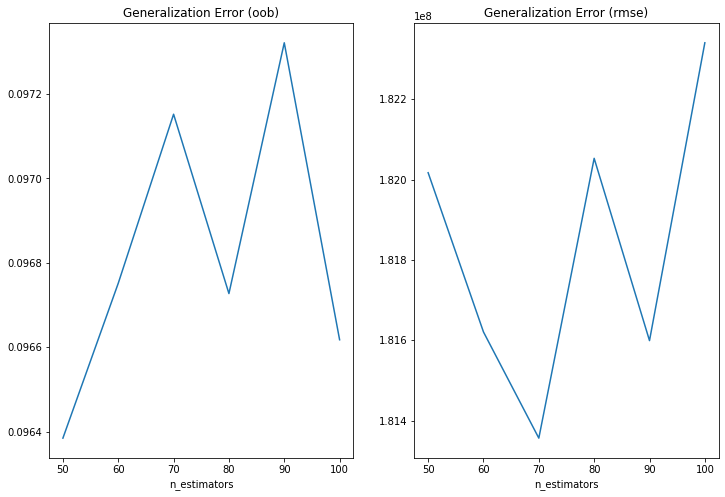

In [17]:
# Set up layout space to place the plots
fig = plt.figure(figsize = (12, 8))
gs = GridSpec(nrows = 1, ncols = 2)

# Plot the necessary graphs for the oob score and rmse values
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(estimators, res_oob)
ax0.set_title('Generalization Error (oob)')
ax0.set_xlabel('n_estimators')
ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(estimators, res_rmse)
ax1.set_title('Generalization Error (rmse)')
ax1.set_xlabel('n_estimators')

In [18]:
# Define the number of estimators we wish to test on 
max_depth = np.array([4, 5, 6, 7, 8])

# Create empty lists to store the rmse and the oob score
res_rmse = np.array([])
res_oob = np.array([])

# Iterate through all n_estimator values 
for i in range(len(max_depth)):
    rf = RandomForestRegressor(n_estimators = 90, max_depth = max_depth[i], n_jobs = -1, oob_score= True, random_state = 30801)
    rf = rf.fit(X_2_train, y_2_train)
    
    # Calculate the prediction values and store them in the appropriate list
    y_pred = rf.predict(X_2_test)
    
    # Calculate the prediction values and store them in the appropriate list
    res_rmse = np.append(res_rmse, mse(y_2_test, y_pred, squared = True))

    # Store the oob_score
    res_oob = np.append(res_oob, rf.oob_score_)

# Calculate the maximum and minimum oob and rmse values and print out which estimator values it corresponds to
max_oob = np.amax(res_oob)
min_rmse = np.amin(res_rmse)
print('Maximum oob score','(max_depth = ', max_depth[np.where(res_oob == max_oob)], '):', np.amax(res_oob), 'Minimum rmse ', '(max_depth = ', max_depth[np.where(res_rmse == min_rmse)], '):', np.amin(res_rmse))

Maximum oob score (max_depth =  [5] ): 0.09732107804607415 Minimum rmse  (max_depth =  [5] ): 181599047.32260847


Text(0.5, 0, 'max_depth')

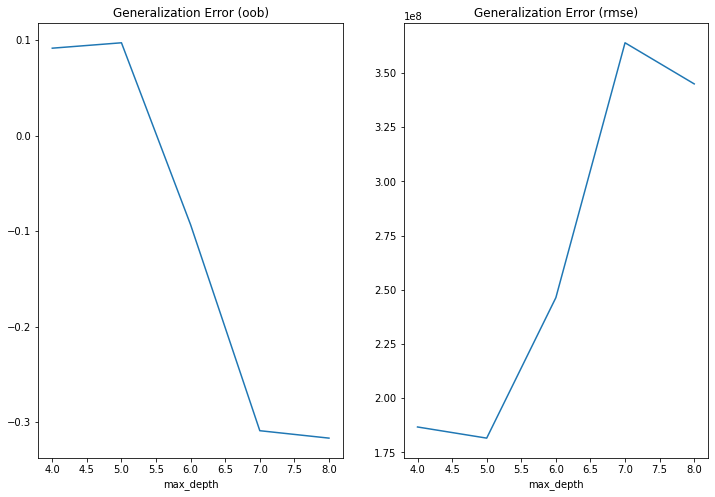

In [19]:
# Set up layout space to place the plots
fig = plt.figure(figsize = (12, 8))
gs = GridSpec(nrows = 1, ncols = 2)

# Plot the necessary graphs for the oob score and rmse values
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(max_depth, res_oob)
ax0.set_title('Generalization Error (oob)')
ax0.set_xlabel('max_depth')
ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(max_depth, res_rmse)
ax1.set_title('Generalization Error (rmse)')
ax1.set_xlabel('max_depth')

Although the rmse slightly disagrees with the oob score in terms of the best model for fitting the n_estimator hyperparameter it is generally consistent between the two methods as n_estimator = 90 stil has the second lowest rmse value. Additionally as the oob score uses datasets not used in the original model it could be suggested that it is a more powerful metric to decide the best hyperparameters compared to the rmse. In terms of max_depth for our model, both the oob score and the rmse seem to agree on the best hyperparameter. Hence, we will fit our original large data with n_estimators = 90, max_depth = 5

## Final Model

In [20]:
# Create a random forest regressor model with the best hyperparameter fits 
rf_final = RandomForestRegressor(n_estimators = 90, max_depth = 5, n_jobs = -1, oob_score = True, random_state = 30801)
rf_final = rf_final.fit(X_1_train, y_1_train)
y_pred = rf_final.predict(X_1_test)

# Calculate its rmse to compare with the previous model
res_rmse = mse(y_1_test, y_pred, squared = True)

# Calculate its oob score
res_oob = rf_final.oob_score_
print('Root mean squared error:', res_rmse,'Out of box score of final model: ', res_oob)

Root mean squared error: 169862278.33397272 Out of box score of final model:  0.16460871657101483


Our final model with the best fit for hyperparameters suggests that the oob_score is 0.165 and has an rmse of 169862278.

In [21]:
# Attain the feature importance values for each column
importances = rf_final.feature_importances_
importances

array([2.07906731e-01, 5.55774179e-01, 7.50083938e-04, 0.00000000e+00,
       1.58958859e-02, 1.28390308e-02, 0.00000000e+00, 0.00000000e+00,
       2.84563953e-05, 1.80139514e-02, 0.00000000e+00, 0.00000000e+00,
       2.21435724e-04, 9.97535921e-02, 4.02276914e-02, 4.84255622e-02,
       1.63400284e-04, 0.00000000e+00])

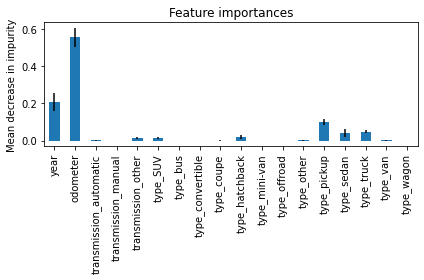

In [22]:
# Create a list of features in the dataset
feature_names = [f"{vehicles.columns[i]}" for i in range(1,len(vehicles.columns))]

# Create a series with the importances and features (as indices)
forest_importances = pd.Series(importances, index=feature_names)

# Plot the features 
fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in rf_final.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The importance of **odometer** came first with 0.56, followed by **year** with 0.21. The rest of the categorical variables led us to conclude that within the **type** column pickups had the most relevancy with 0.09, followed by truck with 0.48. Finally, categorical variables of **type** had the minimal relevancy with the highest being other at 0.02 and SUV at 0.01.